In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import Simulator as sim

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

from random import randint


### This version time is taken out of model inputs ###


Using TensorFlow backend.


In [2]:
### Creating dataset from data points ###

c = 4   # Damping constant
k = 2   # Stiffness of the spring
m = 20  # Mass
F = 5   # Force


vals = sim.generate(c,k,m,F) ## Generating the training data with separate module ##


list_t = list(zip(vals[1], vals[2]))
dframe = pd.DataFrame(list_t, columns=["Speed", 'Position']) ##Creating Pandas DF from data ##
#dframe = dframe.sample(frac=1) ## Suffle data so we can use validation split ##
print (dframe)

Y = dframe["Position"].iloc[1:] ## Deleting first row so predictions are k+1 ##
X = dframe.head(-1)


        Speed  Position
0    0.000000  0.000000
1    0.014924  0.000449
2    0.029665  0.001789
3    0.044219  0.004009
4    0.058584  0.007097
..        ...       ...
995 -0.001677  2.497899
996 -0.001644  2.497799
997 -0.001611  2.497701
998 -0.001577  2.497606
999 -0.001544  2.497512

[1000 rows x 2 columns]


In [3]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [4]:

### CREATING NN MODEL ###

model=Sequential([Dense(2,input_shape=(2,), activation="relu"),
                  Dense(3,activation="relu"),
                  Dense(4,activation="relu"),
                  Dense(1)])

model.compile(Adam(lr=0.001),loss=custom_loss)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=1000, callbacks= [keras.callbacks.EarlyStopping(patience=5)])

## , validation_split=0.1


Epoch 1/1000
999/999 [==============================] - 1s 1ms/step - loss: 1.8447
Epoch 2/1000
999/999 [==============================] - 0s 92us/step - loss: 1.4254
Epoch 3/1000
999/999 [==============================] - 0s 92us/step - loss: 0.9974


C:\Users\juhop\anaconda3\envs\bach\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 4/1000
999/999 [==============================] - 0s 92us/step - loss: 0.6009
Epoch 5/1000
999/999 [==============================] - 0s 96us/step - loss: 0.2893
Epoch 6/1000
999/999 [==============================] - 0s 92us/step - loss: 0.1035
Epoch 7/1000
999/999 [==============================] - 0s 92us/step - loss: 0.0313
Epoch 8/1000
999/999 [==============================] - 0s 92us/step - loss: 0.0136
Epoch 9/1000
999/999 [==============================] - 0s 87us/step - loss: 0.0104
Epoch 10/1000
999/999 [==============================] - 0s 89us/step - loss: 0.0089
Epoch 11/1000
999/999 [==============================] - 0s 89us/step - loss: 0.0075
Epoch 12/1000
999/999 [==============================] - 0s 90us/step - loss: 0.0062
Epoch 13/1000
999/999 [==============================] - 0s 90us/step - loss: 0.0052
Epoch 14/1000
999/999 [==============================] - 0s 90us/step - loss: 0.0044
Epoch 15/1000
999/999 [==============================] - 0s 90us/step -

999/999 [==============================] - 0s 90us/step - loss: 7.7292e-04
Epoch 100/1000
999/999 [==============================] - 0s 98us/step - loss: 7.4296e-04
Epoch 101/1000
999/999 [==============================] - 0s 148us/step - loss: 7.2096e-04
Epoch 102/1000
999/999 [==============================] - 0s 143us/step - loss: 6.9415e-04
Epoch 103/1000
999/999 [==============================] - 0s 144us/step - loss: 6.7015e-04
Epoch 104/1000
999/999 [==============================] - 0s 147us/step - loss: 6.4751e-04
Epoch 105/1000
999/999 [==============================] - 0s 142us/step - loss: 6.2319e-04
Epoch 106/1000
999/999 [==============================] - 0s 142us/step - loss: 6.0357e-04
Epoch 107/1000
999/999 [==============================] - 0s 149us/step - loss: 5.7965e-04
Epoch 108/1000
999/999 [==============================] - 0s 145us/step - loss: 5.5492e-04
Epoch 109/1000
999/999 [==============================] - 0s 151us/step - loss: 5.3124e-04
Epoch 110/1000
9

999/999 [==============================] - 0s 163us/step - loss: 3.0658e-06
Epoch 190/1000
999/999 [==============================] - 0s 172us/step - loss: 2.9573e-06
Epoch 191/1000
999/999 [==============================] - 0s 175us/step - loss: 2.8428e-06
Epoch 192/1000
999/999 [==============================] - 0s 166us/step - loss: 2.7660e-06
Epoch 193/1000
999/999 [==============================] - 0s 161us/step - loss: 2.7073e-06
Epoch 194/1000
999/999 [==============================] - 0s 151us/step - loss: 2.5920e-06
Epoch 195/1000
999/999 [==============================] - 0s 154us/step - loss: 2.5252e-06
Epoch 196/1000
999/999 [==============================] - 0s 162us/step - loss: 2.4491e-06
Epoch 197/1000
999/999 [==============================] - 0s 172us/step - loss: 2.4116e-06
Epoch 198/1000
999/999 [==============================] - 0s 198us/step - loss: 2.2932e-06
Epoch 199/1000
999/999 [==============================] - 0s 175us/step - loss: 2.2726e-06
Epoch 200/1000

999/999 [==============================] - 0s 154us/step - loss: 2.4074e-07
Epoch 280/1000
999/999 [==============================] - 0s 151us/step - loss: 2.3681e-07
Epoch 281/1000
999/999 [==============================] - 0s 155us/step - loss: 2.2835e-07
Epoch 282/1000
999/999 [==============================] - 0s 151us/step - loss: 2.2328e-07
Epoch 283/1000
999/999 [==============================] - 0s 155us/step - loss: 2.0507e-07
Epoch 284/1000
999/999 [==============================] - 0s 155us/step - loss: 2.1071e-07
Epoch 285/1000
999/999 [==============================] - 0s 150us/step - loss: 1.9856e-07
Epoch 286/1000
999/999 [==============================] - 0s 176us/step - loss: 1.9801e-07
Epoch 287/1000
999/999 [==============================] - 0s 169us/step - loss: 1.8308e-07
Epoch 288/1000
999/999 [==============================] - 0s 163us/step - loss: 1.7465e-07
Epoch 289/1000
999/999 [==============================] - 0s 172us/step - loss: 1.7267e-07
Epoch 290/1000

999/999 [==============================] - 0s 149us/step - loss: 1.4926e-08
Epoch 370/1000
999/999 [==============================] - 0s 147us/step - loss: 1.1993e-08
Epoch 371/1000
999/999 [==============================] - 0s 142us/step - loss: 1.7065e-08
Epoch 372/1000
999/999 [==============================] - 0s 146us/step - loss: 1.3847e-08
Epoch 373/1000
999/999 [==============================] - 0s 145us/step - loss: 1.2670e-08
Epoch 374/1000
999/999 [==============================] - 0s 147us/step - loss: 1.0488e-08
Epoch 375/1000
999/999 [==============================] - 0s 194us/step - loss: 1.3552e-08
Epoch 376/1000
999/999 [==============================] - 0s 171us/step - loss: 1.1320e-08
Epoch 377/1000
999/999 [==============================] - 0s 171us/step - loss: 1.3336e-08
Epoch 378/1000
999/999 [==============================] - 0s 160us/step - loss: 1.2808e-08
Epoch 379/1000
999/999 [==============================] - 0s 154us/step - loss: 1.0159e-08
Epoch 380/1000

999/999 [==============================] - 0s 149us/step - loss: 7.5925e-09
Epoch 460/1000
999/999 [==============================] - 0s 149us/step - loss: 1.1535e-08
Epoch 461/1000
999/999 [==============================] - 0s 154us/step - loss: 1.8656e-08
Epoch 462/1000
999/999 [==============================] - 0s 141us/step - loss: 2.8491e-08
Epoch 463/1000
999/999 [==============================] - 0s 144us/step - loss: 4.0886e-08
Epoch 464/1000
999/999 [==============================] - 0s 145us/step - loss: 5.6842e-08
Epoch 465/1000
999/999 [==============================] - 0s 146us/step - loss: 9.0202e-07
Epoch 466/1000
999/999 [==============================] - 0s 143us/step - loss: 3.2889e-07
Epoch 467/1000
999/999 [==============================] - 0s 146us/step - loss: 9.2957e-08
Epoch 468/1000
999/999 [==============================] - 0s 147us/step - loss: 6.1608e-08
Epoch 469/1000
999/999 [==============================] - 0s 153us/step - loss: 7.5704e-09
Epoch 470/1000

999/999 [==============================] - 0s 144us/step - loss: 4.6875e-07
Epoch 550/1000
999/999 [==============================] - 0s 147us/step - loss: 1.1497e-07
Epoch 551/1000
999/999 [==============================] - 0s 146us/step - loss: 1.7455e-08
Epoch 552/1000
999/999 [==============================] - 0s 144us/step - loss: 3.5530e-08
Epoch 553/1000
999/999 [==============================] - 0s 144us/step - loss: 2.0854e-07
Epoch 554/1000
999/999 [==============================] - 0s 148us/step - loss: 1.3601e-08
Epoch 555/1000
999/999 [==============================] - 0s 148us/step - loss: 1.0029e-08
Epoch 556/1000
999/999 [==============================] - 0s 145us/step - loss: 1.3009e-07
Epoch 557/1000
999/999 [==============================] - 0s 143us/step - loss: 7.4544e-07
Epoch 558/1000
999/999 [==============================] - 0s 144us/step - loss: 4.3508e-08
Epoch 559/1000
999/999 [==============================] - 0s 146us/step - loss: 1.2088e-09
Epoch 560/1000

Epoch 639/1000
999/999 [==============================] - 0s 176us/step - loss: 7.7726e-09
Epoch 640/1000
999/999 [==============================] - 0s 172us/step - loss: 8.1530e-10
Epoch 641/1000
999/999 [==============================] - 0s 151us/step - loss: 1.4869e-09
Epoch 642/1000
999/999 [==============================] - 0s 168us/step - loss: 6.1341e-10
Epoch 643/1000
999/999 [==============================] - 0s 142us/step - loss: 8.8953e-10
Epoch 644/1000
999/999 [==============================] - 0s 191us/step - loss: 5.3288e-10
Epoch 645/1000
999/999 [==============================] - 0s 137us/step - loss: 2.1591e-09
Epoch 646/1000
999/999 [==============================] - 0s 183us/step - loss: 3.0112e-09
Epoch 647/1000
999/999 [==============================] - 0s 139us/step - loss: 1.5568e-09
Epoch 648/1000
999/999 [==============================] - 0s 163us/step - loss: 1.7760e-09
Epoch 649/1000
999/999 [==============================] - 0s 163us/step - loss: 8.0015e-10

999/999 [==============================] - 0s 145us/step - loss: 4.1892e-09
Epoch 729/1000
999/999 [==============================] - 0s 144us/step - loss: 2.5460e-08
Epoch 730/1000
999/999 [==============================] - 0s 140us/step - loss: 5.5333e-08
Epoch 731/1000
999/999 [==============================] - 0s 149us/step - loss: 4.7028e-08 0s - loss: 6.6819e-
Epoch 732/1000
999/999 [==============================] - 0s 145us/step - loss: 2.2025e-08
Epoch 733/1000
999/999 [==============================] - 0s 145us/step - loss: 7.0201e-08
Epoch 734/1000
999/999 [==============================] - 0s 147us/step - loss: 6.4039e-07
Epoch 735/1000
999/999 [==============================] - 0s 147us/step - loss: 8.0258e-08
Epoch 736/1000
999/999 [==============================] - 0s 153us/step - loss: 7.0489e-08
Epoch 737/1000
999/999 [==============================] - 0s 151us/step - loss: 1.8333e-07
Epoch 738/1000
999/999 [==============================] - 0s 148us/step - loss: 4.393

999/999 [==============================] - 0s 148us/step - loss: 3.8424e-08
Epoch 818/1000
999/999 [==============================] - 0s 149us/step - loss: 7.2311e-07
Epoch 819/1000
999/999 [==============================] - 0s 153us/step - loss: 1.8004e-07
Epoch 820/1000
999/999 [==============================] - 0s 149us/step - loss: 3.2638e-08
Epoch 821/1000
999/999 [==============================] - 0s 150us/step - loss: 1.4748e-08
Epoch 822/1000
999/999 [==============================] - 0s 151us/step - loss: 5.6479e-09
Epoch 823/1000
999/999 [==============================] - 0s 148us/step - loss: 1.0362e-09
Epoch 824/1000
999/999 [==============================] - 0s 151us/step - loss: 5.2099e-10
Epoch 825/1000
999/999 [==============================] - 0s 151us/step - loss: 1.1113e-09
Epoch 826/1000
999/999 [==============================] - 0s 152us/step - loss: 5.6553e-07
Epoch 827/1000
999/999 [==============================] - 0s 150us/step - loss: 4.7154e-07
Epoch 828/1000

999/999 [==============================] - 0s 148us/step - loss: 5.3246e-09
Epoch 908/1000
999/999 [==============================] - 0s 146us/step - loss: 1.2729e-07
Epoch 909/1000
999/999 [==============================] - 0s 147us/step - loss: 2.5866e-07
Epoch 910/1000
999/999 [==============================] - 0s 148us/step - loss: 6.3699e-08
Epoch 911/1000
999/999 [==============================] - 0s 148us/step - loss: 9.3075e-09
Epoch 912/1000
999/999 [==============================] - 0s 155us/step - loss: 5.8403e-10
Epoch 913/1000
999/999 [==============================] - 0s 159us/step - loss: 4.6792e-09
Epoch 914/1000
999/999 [==============================] - 0s 158us/step - loss: 9.9818e-07
Epoch 915/1000
999/999 [==============================] - 0s 162us/step - loss: 7.6514e-07
Epoch 916/1000
999/999 [==============================] - 0s 163us/step - loss: 5.9932e-08
Epoch 917/1000
999/999 [==============================] - 0s 160us/step - loss: 3.5777e-09
Epoch 918/1000

999/999 [==============================] - 0s 148us/step - loss: 4.2583e-09 0s - loss: 4.7956e-0
Epoch 997/1000
999/999 [==============================] - 0s 144us/step - loss: 4.3832e-10
Epoch 998/1000
999/999 [==============================] - 0s 145us/step - loss: 1.3520e-09
Epoch 999/1000
999/999 [==============================] - 0s 152us/step - loss: 6.4516e-10
Epoch 1000/1000
999/999 [==============================] - 0s 148us/step - loss: 2.3096e-09


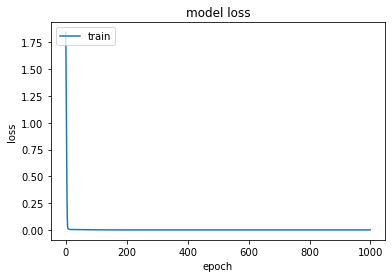

In [6]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
### Creating testing data ###

#c = 5 # Damping constant
#k = 6 # Stiffness of the spring
#m = 40 # Mass
F2 = randint(1,10)  #Different force for testing


testvals = sim.generate(c,k,m,F2,x0=0.1) ## Generating testing data##


list_t2 = list(zip( testvals[1], testvals[2]))
dframe2 = pd.DataFrame(list_t2, columns=["Speed", 'Position'])
timeframe = pd.DataFrame(testvals[0], columns=["Time"]) ## For plotting resutlts


print (dframe2)

Y2 = dframe2["Position"].iloc[1:]
X2 = dframe2.head(-1)


        Speed  Position
0    0.000000  0.100000
1    0.014327  0.100431
2    0.028478  0.101717
3    0.042450  0.103848
4    0.056240  0.106813
..        ...       ...
995 -0.001608  2.497986
996 -0.001577  2.497891
997 -0.001545  2.497797
998 -0.001513  2.497705
999 -0.001481  2.497615

[1000 rows x 2 columns]


999/999 [==============================] - 0s 23us/step
1.10331008938034e-09


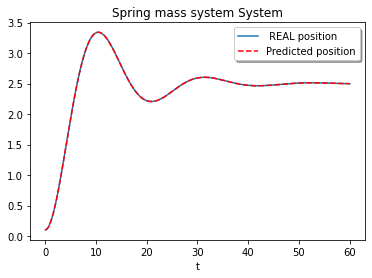

In [14]:
#### Test ####

results = model.evaluate(X, Y, batch_size=128)
print(results)

y_pred = [] ## List for predictions

for row in X2.itertuples(): ## Iterates trough test set getting predictions
    xr = model.predict(np.array([[row.Speed, row.Position]])) 
    y_pred.append(float(xr[0]))

 

plt.plot(timeframe.iloc[1:], Y2)
plt.plot(timeframe.iloc[1:], y_pred, linestyle='dashed', color='red')

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('Spring mass system System')
plt.show()

In [12]:
keras.backend.clear_session() ## To start over again